# Simulación TFG

#### Carmen Martín Turrero

El objetivo de esta simulación es estudiar un sistema cuyo Hamiltoniano es del tipo:

$$\mathcal{H} = \sigma_z + H_R + \sigma_x R$$

In [1]:
from numpy import array, dot, transpose, identity, linspace, zeros, sqrt, linalg, exp, kron, trace, log, append, arange, size
import numpy as np
from tenpy.linalg import random_matrix

#Comenzamos haciendo un ejemplo en el que tomamos que la dimensión del baño es N = 4.

N = 4

#En este caso, los elementos de la base del baño y el sistema los escogemos:

#Sistema
up = array([1,0])
down = array([0,1])

#Baño N = 4
b1 = array([[1],[0],[0],[0]])
b2 = array([[0],[1],[0],[0]])
b3 = array([[0],[0],[1],[0]])
b4 = array([[0],[0],[0],[1]])


#Los elementos de la base del Universo son las posibles combinaciones tensoriales entre los elementos de la base del sistema 
#y los del baño.En este caso, 8 elementos.

## Construcción del Hamiltoniano

In [15]:
#Pedimos la dimensión del baño:
N = int(input("Introduzca la dimensión del baño:"))

#Creamos dos matrices formadas por los elementos de las dos bases, para poder usar el código:
Sys = identity(2)
B = identity(N)

#Escribimos las matrices de Pauli:

sigmax = array([[0,1],
                [1,0]])
sigmaz = array([[1,0],
                [0,-1]])

#Damos valores H_r y R:

Hr = zeros((N,N))
diag = linspace(-0.5, 0.5, N)

for i in range(N):
    Hr[i,i] = diag[i]


X = random_matrix.GOE((N,N))
R = X/sqrt(8*N)

print('El Hamiltoniano del baño viene descrito por la matriz H_r:')
print(Hr)
print('La matriz R de acoplamiento es:')
print(R)

Introduzca la dimensión del baño:200
El Hamiltoniano del baño viene descrito por la matriz H_r:
[[-0.5         0.          0.         ...  0.          0.
   0.        ]
 [ 0.         -0.49497487  0.         ...  0.          0.
   0.        ]
 [ 0.          0.         -0.48994975 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.48994975  0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.49497487
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.5       ]]
La matriz R de acoplamiento es:
[[-0.00947937 -0.01323859  0.00713535 ...  0.02276418 -0.01195956
  -0.01807541]
 [-0.01323859  0.00341708  0.002555   ... -0.00315802  0.0148426
  -0.00443961]
 [ 0.00713535  0.002555    0.03083216 ...  0.0231662  -0.00919625
  -0.01560319]
 ...
 [ 0.02276418 -0.00315802  0.0231662  ...  0.01872338  0.03625081
  -0.01441788]
 [-0.01195956  0.0148426  -0.00919625 ...  0.03625081 -0.07155051
  -0.00966099]
 [-0.018075

In [16]:
#Construimos el hamiltoniano como una matriz 2Nx2N: H_nm = <n|H|m>

H = zeros((2*N,2*N))
p = 0

for i in range(N):
    a = array(B[:,i])
    for m in range(2):
        b = array(Sys[:,m])
        q = 0
        for k in range(N):
            c = array(B[:,k])
            for l in range(2):
                d = array(Sys[:,l])
                H[p,q]= dot(b,dot(sigmaz,d))*dot(a,c) + dot(b,d)*dot(a,dot(Hr,c)) + dot(b,dot(sigmax,d))*dot(a,dot(R,c))
                q = q+1
        p = p+1

print('El Hamiltoniano del sistema es:')
print(H)

El Hamiltoniano del sistema es:
[[ 0.5        -0.00947937  0.         ... -0.01195956  0.
  -0.01807541]
 [-0.00947937 -1.5        -0.01323859 ...  0.         -0.01807541
   0.        ]
 [ 0.         -0.01323859  0.50502513 ...  0.0148426   0.
  -0.00443961]
 ...
 [-0.01195956  0.          0.0148426  ... -0.50502513 -0.00966099
   0.        ]
 [ 0.         -0.01807541  0.         ... -0.00966099  1.5
   0.01994792]
 [-0.01807541  0.         -0.00443961 ...  0.          0.01994792
  -0.5       ]]


In [17]:
Eigvals, Eigvect = np.linalg.eig(H)

D = zeros((2*N,2*N))
for i in range(2*N):
    D[i,i] = Eigvals[i]

print('La matriz diagonalizada del Hamiltoniano es:')    
print(D)

print('Y los autovectores correspondientes son:')
print(Eigvect) 

#Las columnas de la matriz Eigvect se corresponden con los autovalores de la misma posición en la matriz diagonal.
#Es decir, el autovector de autovalor D(i,i) es Eigvect[:,i].

La matriz diagonalizada del Hamiltoniano es:
[[-1.52624943  0.          0.         ...  0.          0.
   0.        ]
 [ 0.         -1.52421213  0.         ...  0.          0.
   0.        ]
 [ 0.          0.         -1.51848628 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.89384243  0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.84568963
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
  -0.87001884]]
Y los autovectores correspondientes son:
[[ 6.83103340e-03  5.31693645e-03  7.67907193e-03 ... -4.11314202e-04
  -5.49525594e-05 -8.29943061e-06]
 [ 7.90580753e-02  9.40699007e-01  9.64505726e-02 ...  5.51897885e-03
   2.52459951e-03 -1.35070030e-03]
 [-5.19898466e-03  7.06379204e-03 -2.87093468e-03 ... -5.92842291e-03
   1.52085716e-03 -3.10212064e-03]
 ...
 [ 3.78362728e-03  2.69914073e-03 -2.19221564e-03 ... -4.04823790e-03
  -8.60914368e-03 -1.42127771e-02]
 [ 4.31216373e-03  9.78246497e-03  2.

## Evolución temporal

Partimos de un estado inicial en el que no hay correlación entre el sistema y el baño, para ver como la evolución del Hamiltoniano produce dicha correlación.

$$\rvert\Psi(0)\rangle = \rvert\chi(0)\rangle \otimes \rvert\psi(0)\rangle$$

* Estado inicial del sistema, $\rvert\chi(0)\rangle$
* Estado inicial del baño, $\rvert\psi(0)\rangle$ : construímos un estado que simule cierta temperatura.

In [18]:
float(input("Defina la temperatura del baño: T(K) = "))

Defina la temperatura del baño: T(K) = 1


1.0

In [19]:
#Estado inicial del sistema
chi0 = up

#Estado inicial del baño
T = 0.5
beta = 1/T   #Tomamos k_B = 1

Z = 0
psi0 = zeros(N)

for i in range(N):
    #Sumatorio para hallar la función de partición
    Z = Z + exp(-beta*Hr[i,i])
    #Aprovechamos el bucle para crear el vector psi(0)
    psi0[i] = exp(-beta*Hr[i,i]/2)

psi0 = psi0/sqrt(Z)

print('El estado inicial del sistema es |\u03C7(0)> =', chi0)
print('El estado inicial del baño a temperatura', T, 'K es |\u03C8(0)> =', psi0)

#En este estado el baño está en equilibrio termodinámico a temperatura 1/beta.

El estado inicial del sistema es |χ(0)> = [1 0]
El estado inicial del baño a temperatura 0.5 K es |ψ(0)> = [0.107457   0.10691837 0.10638244 0.10584919 0.10531862 0.10479071
 0.10426545 0.10374281 0.1032228  0.10270539 0.10219058 0.10167835
 0.10116868 0.10066157 0.100157   0.09965497 0.09915544 0.09865842
 0.0981639  0.09767185 0.09718227 0.09669514 0.09621045 0.09572819
 0.09524835 0.09477092 0.09429588 0.09382322 0.09335293 0.09288499
 0.09241941 0.09195615 0.09149522 0.0910366  0.09058028 0.09012624
 0.08967448 0.08922499 0.08877774 0.08833274 0.08788997 0.08744942
 0.08701108 0.08657494 0.08614098 0.08570919 0.08527958 0.08485211
 0.08442679 0.0840036  0.08358253 0.08316357 0.08274671 0.08233194
 0.08191925 0.08150863 0.08110006 0.08069355 0.08028907 0.07988662
 0.07948618 0.07908776 0.07869133 0.07829689 0.07790442 0.07751392
 0.07712538 0.07673879 0.07635414 0.07597141 0.0755906  0.0752117
 0.0748347  0.07445959 0.07408636 0.073715   0.0733455  0.07297786
 0.07261206 0.07224809 

In [20]:
#Estado inicial del Universo
Psi0 = kron(chi0,psi0)
print('El estado inicial del universo es |\u03A8(0)> =', Psi0)

El estado inicial del universo es |Ψ(0)> = [0.107457   0.10691837 0.10638244 0.10584919 0.10531862 0.10479071
 0.10426545 0.10374281 0.1032228  0.10270539 0.10219058 0.10167835
 0.10116868 0.10066157 0.100157   0.09965497 0.09915544 0.09865842
 0.0981639  0.09767185 0.09718227 0.09669514 0.09621045 0.09572819
 0.09524835 0.09477092 0.09429588 0.09382322 0.09335293 0.09288499
 0.09241941 0.09195615 0.09149522 0.0910366  0.09058028 0.09012624
 0.08967448 0.08922499 0.08877774 0.08833274 0.08788997 0.08744942
 0.08701108 0.08657494 0.08614098 0.08570919 0.08527958 0.08485211
 0.08442679 0.0840036  0.08358253 0.08316357 0.08274671 0.08233194
 0.08191925 0.08150863 0.08110006 0.08069355 0.08028907 0.07988662
 0.07948618 0.07908776 0.07869133 0.07829689 0.07790442 0.07751392
 0.07712538 0.07673879 0.07635414 0.07597141 0.0755906  0.0752117
 0.0748347  0.07445959 0.07408636 0.073715   0.0733455  0.07297786
 0.07261206 0.07224809 0.07188594 0.07152561 0.07116709 0.07081036
 0.07045542 0.070102

Calculemos el estado inicial del Universo en la base de autovectores del Hamiltoniano:

$$\rvert\Psi(0)\rangle = \underset{n}{\sum}\langle\Psi_{0}\rvert E_{n}\rangle\rvert E_{n}\rangle\equiv\alpha_n\rvert E_{n}\rangle $$

In [21]:
alpha = zeros(2*N)

for i in range(2*N):
    alpha[i] = dot(Psi0,Eigvect[:,i])

print(alpha)

[ 1.20872870e-01  1.07681954e-01 -6.39512082e-02  7.37789637e-02
 -1.60572038e-01  6.35354634e-04 -1.25355635e-01  2.71477655e-02
 -5.79669717e-02  5.81344744e-02  1.51857923e-01  4.15401314e-02
 -7.44815803e-02 -8.81141284e-02  4.30271291e-02  1.34487010e-01
 -1.10811811e-01 -5.29162034e-02 -1.04812104e-01  5.08821653e-02
 -1.15910715e-01  2.26415138e-03 -2.84874759e-03  3.68336060e-03
  1.13527657e-03  9.31718146e-03 -3.44334921e-03  1.88262331e-03
 -4.44096706e-03  3.27036964e-03  5.00766062e-03 -6.83117875e-03
 -6.86288257e-03 -2.58863337e-03  4.82993983e-03 -1.15116604e-02
  4.32163293e-03 -1.80693126e-03 -1.25895515e-03  6.25390996e-03
 -2.03451610e-03  2.55537265e-04  1.09334646e-03  1.10829921e-03
 -3.98691182e-03  2.53100486e-03  2.25631804e-03 -2.55740838e-03
 -3.98705559e-03  3.48967947e-03  2.11062299e-03  5.71383299e-02
  5.68244725e-02 -1.33644013e-01 -1.13570401e-01 -4.86076014e-02
 -6.59855565e-02 -1.31032104e-01  1.63455182e-02  1.83602700e-03
 -1.99539405e-03  1.38281

La evolución temporal en esta base es:

$$\rvert\Psi(t)\rangle = \underset{n}{\sum}\alpha_n e^{-iE_{n}t/\hbar}\rvert E_{n}\rangle $$

In [22]:
def ev_temp(t):
    hbarra = 1
    Psit = 0
    for i in range(2*N):
        Psit += alpha[i]*exp(-1j*D[i,i]*t/hbarra)*Eigvect[:,i]
    return Psit

A continuación, deshacemos el cambio de base, para poder calcular la entropía utilizando la base original sistema-baño:

$$\rvert\Psi(t)\rangle = \underset{nn}{\sum}C_{nm}(t) \rvert n\rangle_{S} \otimes \rvert m\rangle_{B}$$

Una vez en la base adecuada, construimos la matriz densidad correspondiente al estado:

$$\rho (t)\equiv \rvert\Psi(t)\rangle\langle\Psi(t)\rvert = \underset{nm,ij}{\sum}C_{ij}^*(t)  C_{nm}(t) \rvert n\rangle_{S}\langle i\rvert_{S} \otimes \rvert m\rangle_{B}\langle j\rvert_{B}$$

In [23]:
def matriz_densidad(C):
    rho  = zeros((2*N,2*N))
    q = 0
    pos_il = 0
    for l in range(N):
        for i in range(2):
            p = 0
            pos_nm = 0
            for m in range(N):
                for n in range(2):
                    rho[p,q] = C[pos_il].conjugate()*C[pos_nm]
                    p += 1
                    pos_nm += 1
            q += 1
            pos_il += 1
    return rho

Posteriormente, se calcula la matriz densidad reducida del sistema. Para ello calculamos la traza de la matriz sobre la base del baño:

$$\rho (t) = Tr_{B}[\rho (t)] = \underset{k}\sum \langle k\rvert\rho (t)\rvert k\rangle_{B}$$

Combinando esta expresión con la que teníamos para la matriz densidad, nos queda una forma de calcularla más simplificada:

$$\rho (t)= \underset{k}{\sum} \underset{nm,ij}{\sum} C_{ij}^*(t)  C_{nm}(t) \rvert n\rangle_{S}\langle i\rvert_{S} \otimes _{B}\langle k\rvert m\rangle_{BB}\langle j\rvert k\rangle_{B} = \underset{k}{\sum} \underset{n,i}{\sum} C_{ik}^*(t)  C_{nk}(t) \rvert n\rangle_{S}\langle i\rvert_{S}$$

debido a que los vectores de la base del baño son ortogonales y, por tanto, $_{B}\langle j\rvert k\rangle_{B} = \delta_{jk}$.

Finalmente, calculamos la entropía de entrelazamiento como:

$$S = -Tr[\rho_{s}(t)]log[\rho_{s}(t)]$$

Y si diagonalizamos la matriz $\rho_{s}(t)$, podemos calcular dicha entropía en función de los autovalores:

$$S = -\underset{i}{\sum}\lambda_{i}log[\lambda_{i}]$$

In [24]:
T = arange(0,40,0.05)
S_times = zeros(size(T))

for t in range(size(T)):
    Psit = ev_temp(T[t])
    #Realizamos el cambio de base:
    C = zeros((N,2), dtype = 'complex_')       #Vector de coeficientes para el estado en función del tiempo en la base original.
    for i in range(N):
        for k in range(2):
            C[i,k] = dot(Psit.conjugate(),kron(Sys[:,k],B[:,i]))
    #Calculamos la matriz densidad reducida del sistema:
    rho_s = zeros((2,2))
    for i in range(2):
        for n in range(2):
            A = 0
            for k in range(N):
                A += C[k,i].conjugate()*C[k,n]
            rho_s[i,n] = A
    #Calculamos la entropía de entrelazamiento:
    lambd = np.linalg.eigvals(rho_s)
    S = 0
    for i in range(2):
        S += lambd[i]*log(lambd[i])
    S_times[t] = -S

<ipython-input-24-5aa3708bdc08>:18: ComplexWarning: Casting complex values to real discards the imaginary part
  rho_s[i,n] = A


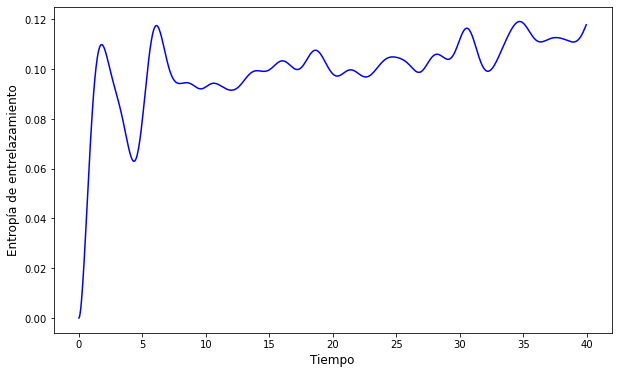

In [25]:
from matplotlib.pyplot import show, plot, xlabel, ylabel, figure, legend, xlim
figure(figsize=(10, 6))
plot(T,S_times,"b")
xlabel( "Tiempo", fontsize = 12, color="black")
ylabel("Entropía de entrelazamiento" , fontsize = 12, color="black")

show()